In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/pizza_sales.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pizza_id,48620.0,24310.500000,14035.529381,1.00,12155.75,24310.5,36465.25,48620.00
order_id,48620.0,10701.479761,6180.119770,1.00,5337.00,10682.5,16100.00,21350.00
quantity,48620.0,1.019622,0.143077,1.00,1.00,1.0,1.00,4.00
unit_price,48620.0,16.494132,3.621789,9.75,12.75,16.5,20.25,35.95
total_price,48620.0,16.821474,4.437398,9.75,12.75,16.5,20.50,83.00


In [8]:
df.value_counts().sum()

np.int64(48620)

In [9]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

Snake casing all the columns and removing spacing with _

In [10]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [11]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

# Step 2: Converting date and time columns into datetime format
# This helps in extracting meaningful time-based insights later


In [12]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

In [13]:
df['order_date'].dtype

dtype('<M8[ns]')

In [14]:
# Converting order_time from object to datetime
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_time'].dtype

dtype('<M8[ns]')

In [15]:
# Extracting hours from order_time to analyze the peak time
df['hour'] = df['order_time'].dt.hour
df[['order_time', 'hour']].head(5)

,order_time,hour
0,2026-01-28 11:38:36,11
1,2026-01-28 11:57:40,11
2,2026-01-28 11:57:40,11
3,2026-01-28 11:57:40,11
4,2026-01-28 11:57:40,11


In [16]:
#extracting the day name from order date to compare  weekdays and weekend sales
df['day_name'] = df['order_date'].dt.day_name()
df[['order_date', 'day_name']].head(5)

,order_date,day_name
0,2015-01-01,Thursday
1,2015-01-01,Thursday
2,2015-01-01,Thursday
3,2015-01-01,Thursday
4,2015-01-01,Thursday


In [17]:

# Extracting month and year for monthly and yearly trend analysis
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df[['order_date', 'month', 'year']].head()


,order_date,month,year
0,2015-01-01,1,2015
1,2015-01-01,1,2015
2,2015-01-01,1,2015
3,2015-01-01,1,2015
4,2015-01-01,1,2015


Analysing and Gathering insights from columns

In [18]:
df['quantity'].value_counts()

,count
quantity,
1,47693
2,903
3,21
4,3


In [19]:
df['pizza_size'].value_counts()

,count
pizza_size,
L,18526
M,15385
S,14137
XL,544
XXL,28


In [20]:
# Understanding price distribution
df['unit_price'].describe()


,unit_price
count,48620.000000
mean,16.494132
std,3.621789
min,9.750000
25%,12.750000
50%,16.500000
75%,20.250000
max,35.950000


<Axes: >

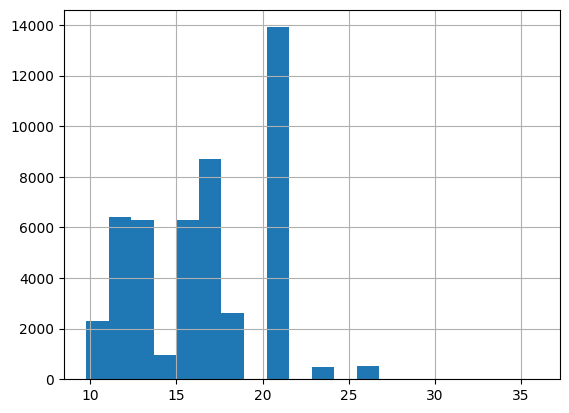

In [21]:
df['unit_price'].hist(bins=20)


In [22]:

# Revenue contribution by pizza category
category_revenue = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)
category_revenue


,total_price
pizza_category,
Classic,220053.10
Supreme,208197.00
Chicken,195919.50
Veggie,193690.45


In [23]:
# Quantity sold by pizza size
size_quantity = df.groupby('pizza_size')['quantity'].sum().sort_values(ascending=False)
size_quantity


,quantity
pizza_size,
L,18956
M,15635
S,14403
XL,552
XXL,28


In [24]:
day_orders = df.groupby('day_name')['order_id'].count().sort_values(ascending=False)
day_orders

,order_id
day_name,
Friday,8106
Saturday,7355
Thursday,7323
Wednesday,6797
Tuesday,6753
Monday,6369
Sunday,5917


In [25]:
# Hourly order distribution
hourly_orders = df.groupby('hour')['order_id'].nunique()
hourly_orders


,order_id
hour,
9,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


<Axes: xlabel='hour'>

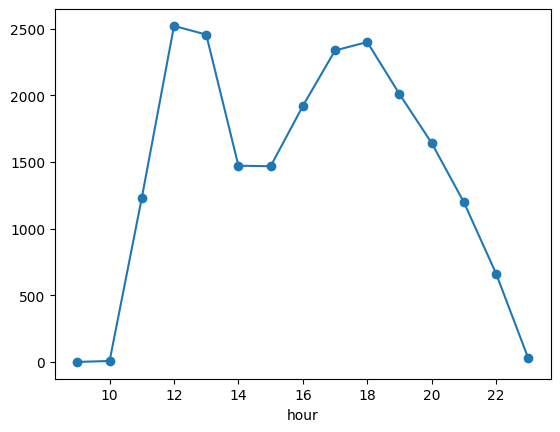

In [26]:
hourly_orders.plot(kind='line', marker='o')


In [27]:
# Revenue by pizza category and size
category_size_revenue = df.groupby(['pizza_category', 'pizza_size'])['total_price'].sum().reset_index()
category_size_revenue


,pizza_category,pizza_size,total_price
0,Chicken,L,102339.00
1,Chicken,M,65224.50
2,Chicken,S,28356.00
3,Classic,L,74518.50
4,Classic,M,60581.75
5,Classic,S,69870.25
6,Classic,XL,14076.00
7,Classic,XXL,1006.60
8,Supreme,L,94258.50
9,Supreme,M,66475.00


In [28]:
# Orders by day and hour
day_hour_orders = df.groupby(['day_name', 'hour'])['order_id'].nunique().reset_index()
day_hour_orders.head()


,day_name,hour,order_id
0,Friday,11,192
1,Friday,12,415
2,Friday,13,413
3,Friday,14,221
4,Friday,15,190


In [29]:
# Average Order Value
aov = df.groupby('order_id')['total_price'].sum().mean()
aov


np.float64(38.30726229508196)

In [30]:
# Monthly revenue trend
monthly_revenue = df.groupby('month')['total_price'].sum()
monthly_revenue


,total_price
month,
1,69793.30
2,65159.60
3,70397.10
4,68736.80
5,71402.75
6,68230.20
7,72557.90
8,68278.25
9,64180.05


<Axes: xlabel='month'>

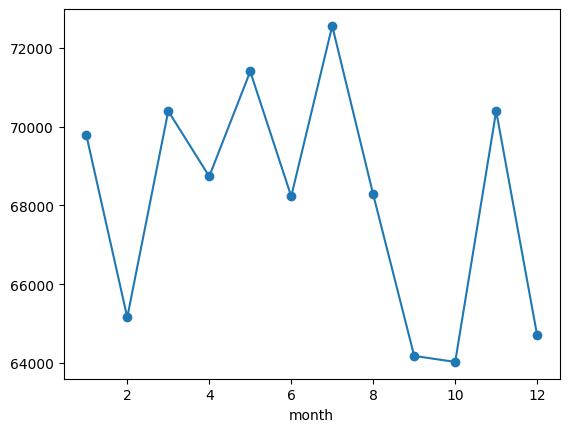

In [31]:
monthly_revenue.plot(kind='line', marker='o')


In [32]:
# Checking outliers in total_price
df['total_price'].describe()


,total_price
count,48620.000000
mean,16.821474
std,4.437398
min,9.750000
25%,12.750000
50%,16.500000
75%,20.500000
max,83.000000


<Axes: >

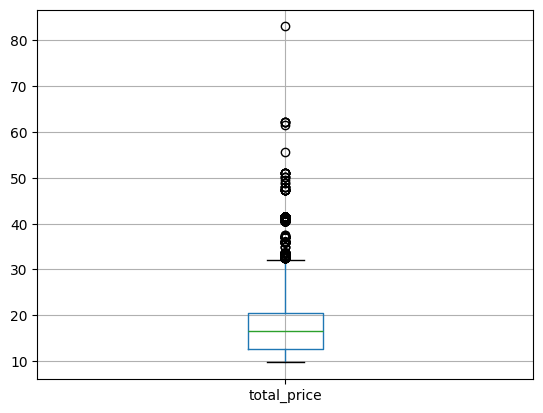

In [33]:
df.boxplot(column='total_price')


In [34]:
# Correlation between numeric variables
df[['quantity', 'unit_price', 'total_price']].corr()


,quantity,unit_price,total_price
quantity,1.000000,0.007142,0.541926
unit_price,0.007142,1.000000,0.836087
total_price,0.541926,0.836087,1.000000


In [35]:
# Top 10 pizzas by revenue
df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(10)


,total_price
pizza_name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25
The Southwest Chicken Pizza,34705.75
The Italian Supreme Pizza,33476.75
The Hawaiian Pizza,32273.25
The Four Cheese Pizza,32265.70


In [36]:
# Orders with more than 1 pizza
df[df['quantity'] > 1].shape[0]


927

In [37]:
df.to_csv("pizza_sales_updated.csv", index=False)


In [38]:
from google.colab import files
files.download("pizza_sales_updated.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>